In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
movies = pd.read_csv('dataset.csv')

In [ ]:
movies.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count,tags
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862.0,"Drama,CrimeFramed in the 1940s for the double ..."
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731.0,"Comedy,Drama,RomanceRaj is a rich, carefree, h..."
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280.0,"Drama,CrimeSpanning the years 1945 to 1955, a ..."
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959.0,"Drama,History,WarThe true story of how busines..."
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811.0,"Drama,CrimeIn the continuing saga of the Corle..."


In [ ]:
movies.columns

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2988 entries, 0 to 2987
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2988 non-null   int64  
 1   title              2988 non-null   object 
 2   genre              2988 non-null   object 
 3   original_language  2988 non-null   object 
 4   overview           2988 non-null   object 
 5   popularity         2988 non-null   float64
 6   release_date       2987 non-null   object 
 7   vote_average       2987 non-null   float64
 8   vote_count         2987 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 210.2+ KB


In [ ]:
movies['tags']= movies['genre'] + movies['overview']

In [ ]:
movies.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count,tags
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862.0,"Drama,CrimeFramed in the 1940s for the double ..."
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731.0,"Comedy,Drama,RomanceRaj is a rich, carefree, h..."
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280.0,"Drama,CrimeSpanning the years 1945 to 1955, a ..."
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959.0,"Drama,History,WarThe true story of how busines..."
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811.0,"Drama,CrimeIn the continuing saga of the Corle..."


In [ ]:
new_df = movies[['id','title','genre','overview','tags']]

In [ ]:
new_df = new_df.drop(columns=['genre','overview'])

In [ ]:
new_df.head()

,id,title,tags
0,278,The Shawshank Redemption,"Drama,CrimeFramed in the 1940s for the double ..."
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,RomanceRaj is a rich, carefree, h..."
2,238,The Godfather,"Drama,CrimeSpanning the years 1945 to 1955, a ..."
3,424,Schindler's List,"Drama,History,WarThe true story of how busines..."
4,240,The Godfather: Part II,"Drama,CrimeIn the continuing saga of the Corle..."


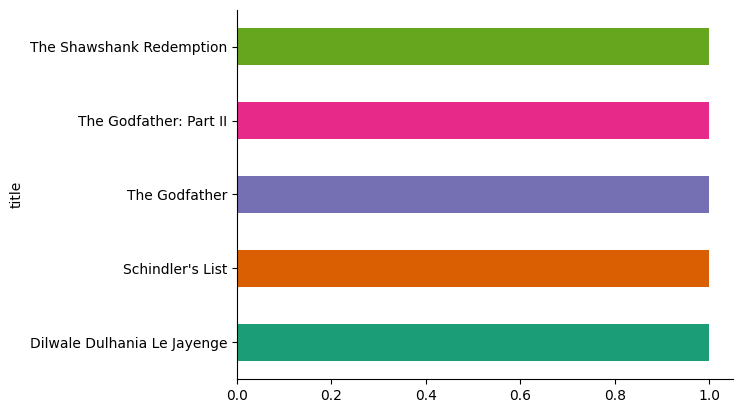

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

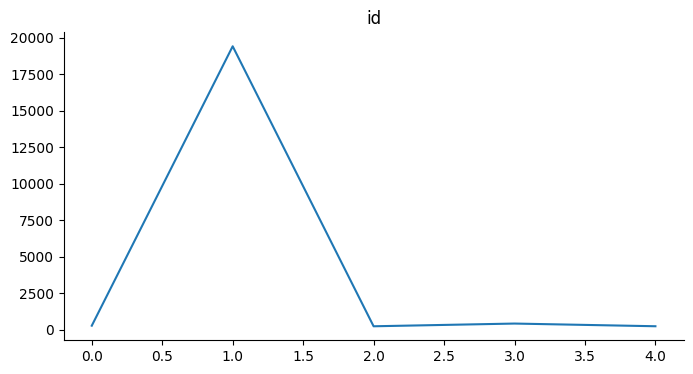

In [ ]:
from matplotlib import pyplot as plt
_df_3['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer(max_features=10000, stop_words='english')

In [ ]:
cv

CountVectorizer(max_features=10000, stop_words='english')

In [ ]:
vec = cv.fit_transform(new_df['tags'].values.astype('U')).toarray()

In [ ]:
vec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
vec.shape

(2988, 10000)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
sim = cosine_similarity(vec)

In [ ]:
sim

array([[1.        , 0.05      , 0.05198752, ..., 0.02214037, 0.05      ,
        0.07905694],
       [0.05      , 1.        , 0.07798129, ..., 0.02214037, 0.1       ,
        0.03952847],
       [0.05198752, 0.07798129, 1.        , ..., 0.06906139, 0.05198752,
        0.08219949],
       ...,
       [0.02214037, 0.02214037, 0.06906139, ..., 1.        , 0.08856149,
        0.035007  ],
       [0.05      , 0.1       , 0.05198752, ..., 0.08856149, 1.        ,
        0.07905694],
       [0.07905694, 0.03952847, 0.08219949, ..., 0.035007  , 0.07905694,
        1.        ]])

In [ ]:
new_df[new_df['title']=='The Shawshank Redemption']

,id,title,tags
0,278,The Shawshank Redemption,"Drama,CrimeFramed in the 1940s for the double ..."


In [ ]:
dist = sorted(list(enumerate(sim[0])),reverse=True,key=lambda vec:vec[1])

In [ ]:
dist

[(0, 1.0000000000000002),
 (2605, 0.1825741858350554),
 (698, 0.17712297710801905),
 (1009, 0.17616606585441105),
 (884, 0.17251638983558856),
 (715, 0.16878498775964423),
 (2963, 0.16685595311797868),
 (2120, 0.1632993161855452),
 (2796, 0.15811388300841897),
 (2626, 0.15000000000000002),
 (393, 0.15),
 (1068, 0.1494035761667992),
 (2081, 0.149071198499986),
 (2927, 0.14804664203952106),
 (1038, 0.14509525002200233),
 (1175, 0.14467284665112362),
 (2583, 0.14433756729740643),
 (725, 0.14301938838683886),
 (791, 0.14301938838683886),
 (1619, 0.1414213562373095),
 (2009, 0.13975424859373686),
 (645, 0.13762047064079508),
 (2225, 0.13693063937629157),
 (196, 0.1355815361366601),
 (279, 0.1355815361366601),
 (1480, 0.1348399724926484),
 (2084, 0.1348399724926484),
 (87, 0.1336306209562122),
 (663, 0.1328422328310143),
 (2925, 0.1318760946791574),
 (441, 0.13176156917368248),
 (1507, 0.13176156917368248),
 (1544, 0.13176156917368248),
 (1646, 0.1315587028960544),
 (1191, 0.1290994448735805

In [ ]:
for i in dist[0:5]:
  print(new_df.iloc[i[0]].title)

The Shawshank Redemption
Pusher II
Cool Hand Luke
A Prophet
Synecdoche, New York


In [ ]:
def recommend(movies):
  index = new_df[new_df['title']==movies].index[0]
  distance = sorted(list(enumerate(sim[index])),reverse=True,key=lambda vec:vec[1])
  for i in distance[0:5]:
    print(new_df.iloc[i[0]].title)

In [ ]:
recommend("Iron Man")

Iron Man
Justice League Dark
Star Wars: The Force Awakens
Avengers: Age of Ultron
Suicide Squad: Hell to Pay
